In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import cos, sin, atan
from math import pi as Pi
import matplotlib.cm as cm
%matplotlib inline
from __future__ import division
import random

## 1    Feedforward: Building a ReLu 2 Layer neural network
### Answers to (1) and (2) are in the attached image

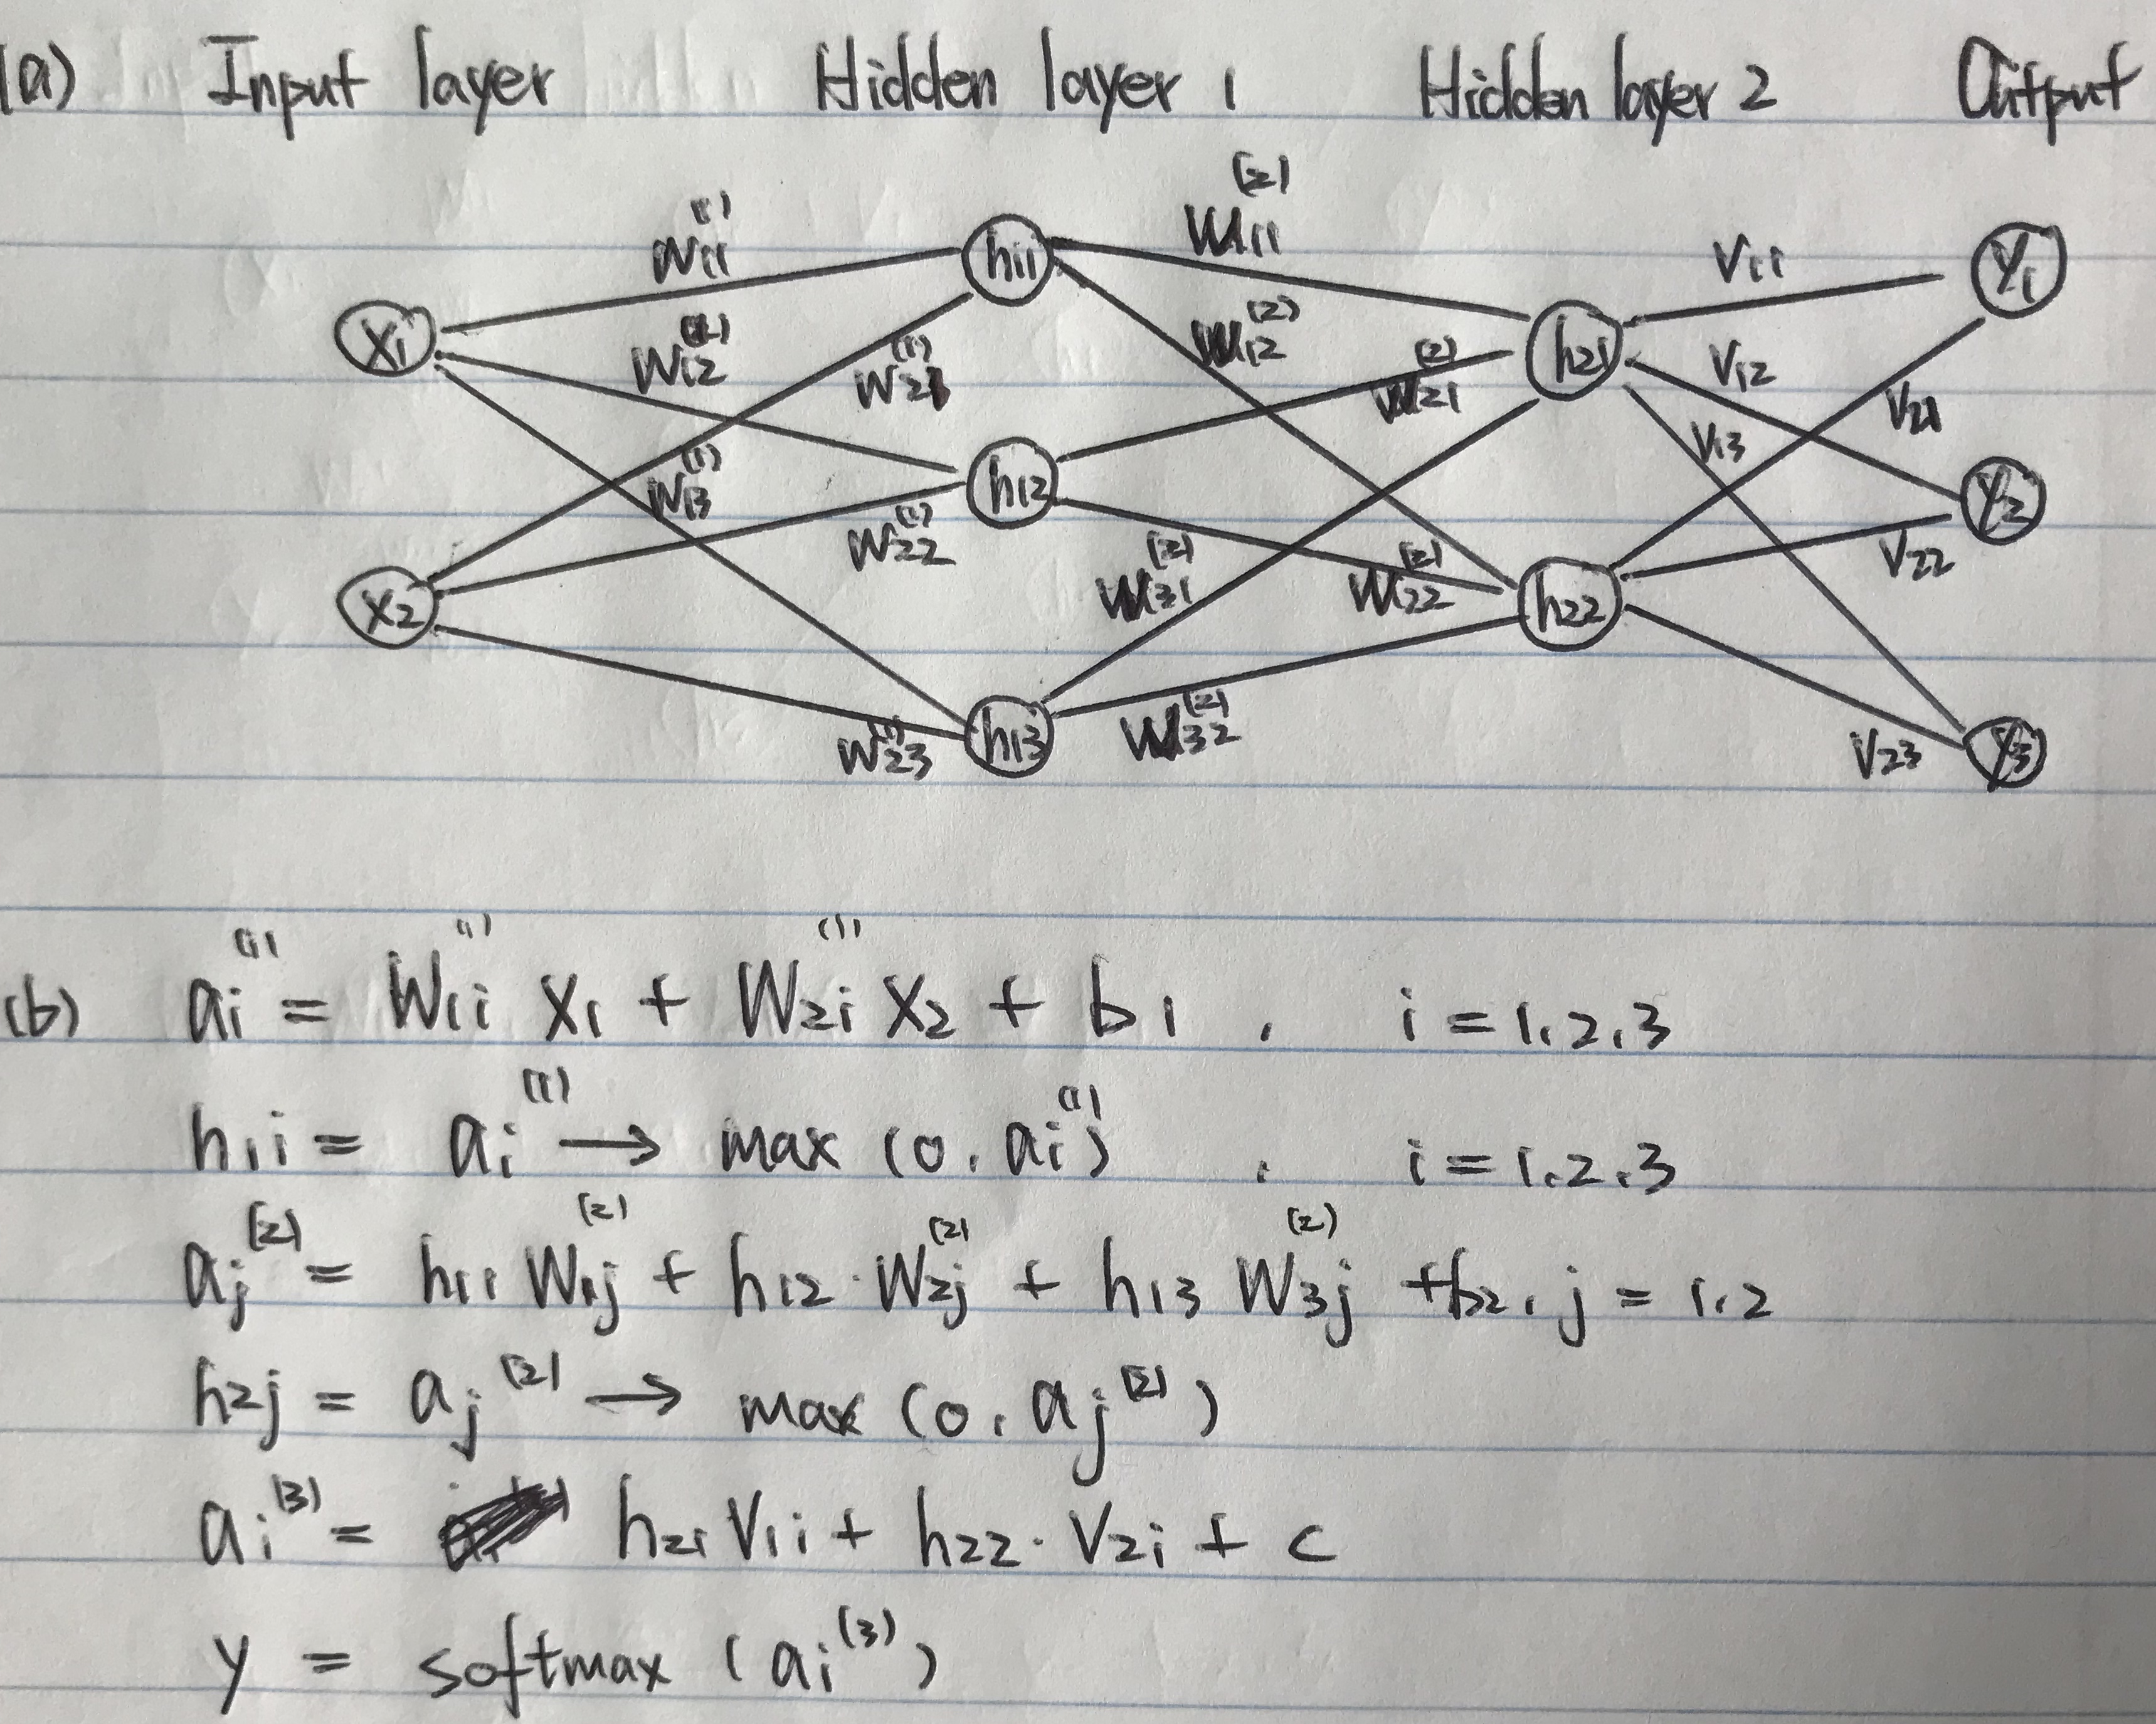

In [2]:
from IPython.display import Image
Image(filename='/Users/troyxiao/Downloads/IMG_0712.JPG') 

### (3) Write out the function in python, call it ff nn 2 ReLu(...)

In [3]:
# ReLu Function
relu = np.vectorize(lambda z: np.fmax(0,z))

# Softmax Function
softmax = lambda x: np.exp(x)/(np.exp(x).sum(axis=1, keepdims=True))

def ff_nn_2_ReLu(x, W1, W2, b1, b2, V, c):
    a1 = x.dot(W1) + b1
    h1 = relu(a1)
    a2 = h1.dot(W2) + b2
    h2 = relu(a2)
    a3 = h2.dot(V) + c
    out = np.round(softmax(a3), 3)
    return out

### (4) What are the class probabilities associated with the forward pass of each sample?

In [4]:
W1 = np.array([[1., 0], [-1., 0], [0, 0.5]])
W2 = np.array([[1., 0, 0], [-1., -1., 0]])
V = np.array([[1., 1.], [0, 0], [-1., -1.]])

b1 = np.array([[0],[0],[1.]])
b2 = np.array([[1.],[-1.]])
c = np.array([[1.],[0],[0]])

X = np.array([[1.,0,0], [-1., -1., 1.]])


print('''
X:\n{X}    
W1:\n{W1}
W2:\n{W2}
V:\n{V} 
b1:\n{b1}
b2:\n{b2}
c:\n{c}
'''.format(X = X.T, W1 = W1.T, W2 = W2.T, b1 = b1.T, b2 = b2.T, V = V.T,c = c.T))

print('''
The class probabilities associated with the forward pass of each sample are:
\n{}
'''.format(ff_nn_2_ReLu(X.T, W1.T, W2.T, b1.T, b2.T, V.T, c.T)))


X:
[[ 1. -1.]
 [ 0. -1.]
 [ 0.  1.]]    
W1:
[[ 1.  -1.   0. ]
 [ 0.   0.   0.5]]
W2:
[[ 1. -1.]
 [ 0. -1.]
 [ 0.  0.]]
V:
[[ 1.  0. -1.]
 [ 1.  0. -1.]] 
b1:
[[ 0.  0.  1.]]
b2:
[[ 1. -1.]]
c:
[[ 1.  0.  0.]]


The class probabilities associated with the forward pass of each sample are:

[[ 0.946  0.047  0.006]
 [ 0.844  0.114  0.042]
 [ 0.844  0.114  0.042]]



## 2 Gradient Descent
### (1) What are the partial derivatives of f with respect to x and to y?

The partial derivatives of f with respect to x is : -2(1-x) - 400x(y-x^2)

The partial derivatives of f with respect to y is : 200(y-x^2)

### (2) Create a visualization of the contours of the Rosenbrock function.

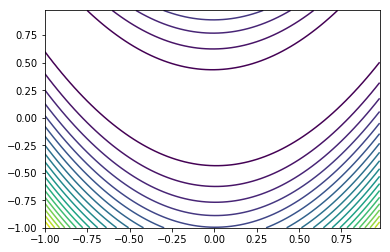

In [5]:
delta = 0.025
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 20)

### (3) Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [6]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = -2*(1-x)-400*x*(y-x**2)
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=0.6):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
        #print('Initial point is',point)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    #print('Current point is',point)
    return np.array(trajectory)

# --- Visualize Trajectory ---
def plotTrajectory(lr):
    np.random.seed(10)
    traj = grad_descent(iterations=1000,learning_rate=lr)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    plt.title('Gradients of Rosenbrock Function with learning rate: {lr}'.format(lr = lr))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


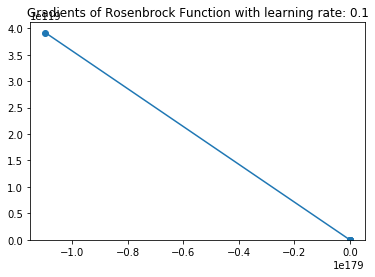

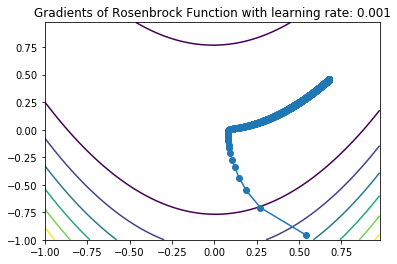

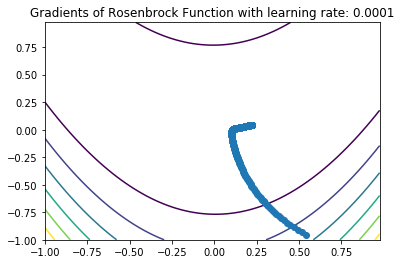

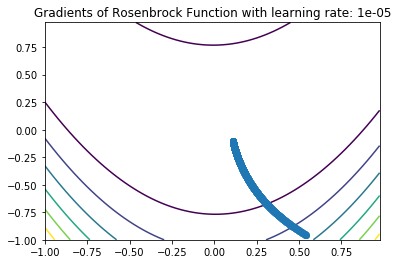

In [7]:
plotTrajectory(0.1)
plotTrajectory(0.001)
plotTrajectory(0.0001)
plotTrajectory(0.00001)

### (4) Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [8]:
# --- Grad Descent ----
def grad_descent_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
        #print('Initial point is',point)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    #print('Current point is',point)
    return np.array(trajectory)

# --- Visualize Trajectory ---
def plotTrajectoryMomentum(iter, a, e):
    np.random.seed(10)
    traj = grad_descent_momentum(iterations=iter, alpha=a, epsilon=e)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    plt.title('Gradients of Rosenbrock Function with iterations {iterations}, alpha {alpha}, epsilon {epsilon}'.format(iterations=iter, alpha=a, epsilon=e))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


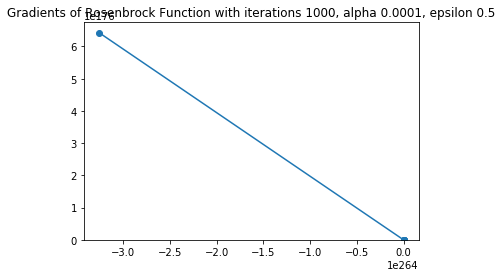

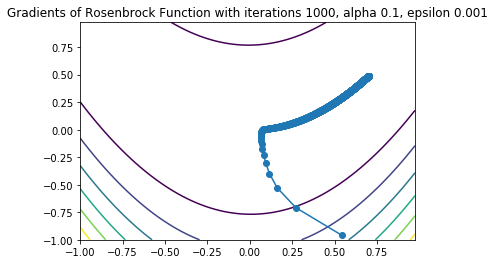

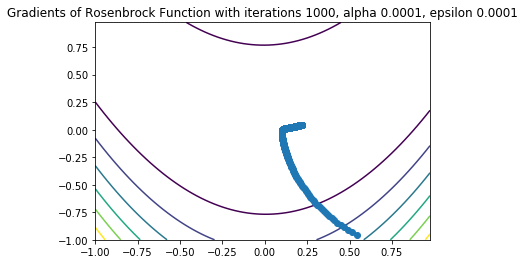

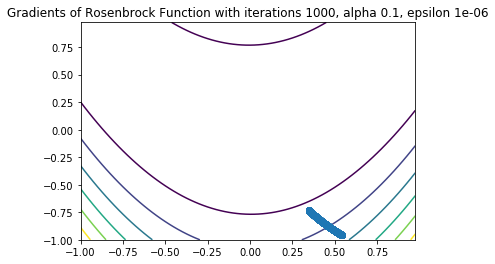

In [9]:
plotTrajectoryMomentum(1000, 0.0001, .5)
plotTrajectoryMomentum(1000, 0.1, .001)
plotTrajectoryMomentum(1000, 0.0001, .0001)
plotTrajectoryMomentum(1000, 0.1, .000001)


## 3 Backprop

### 1. For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

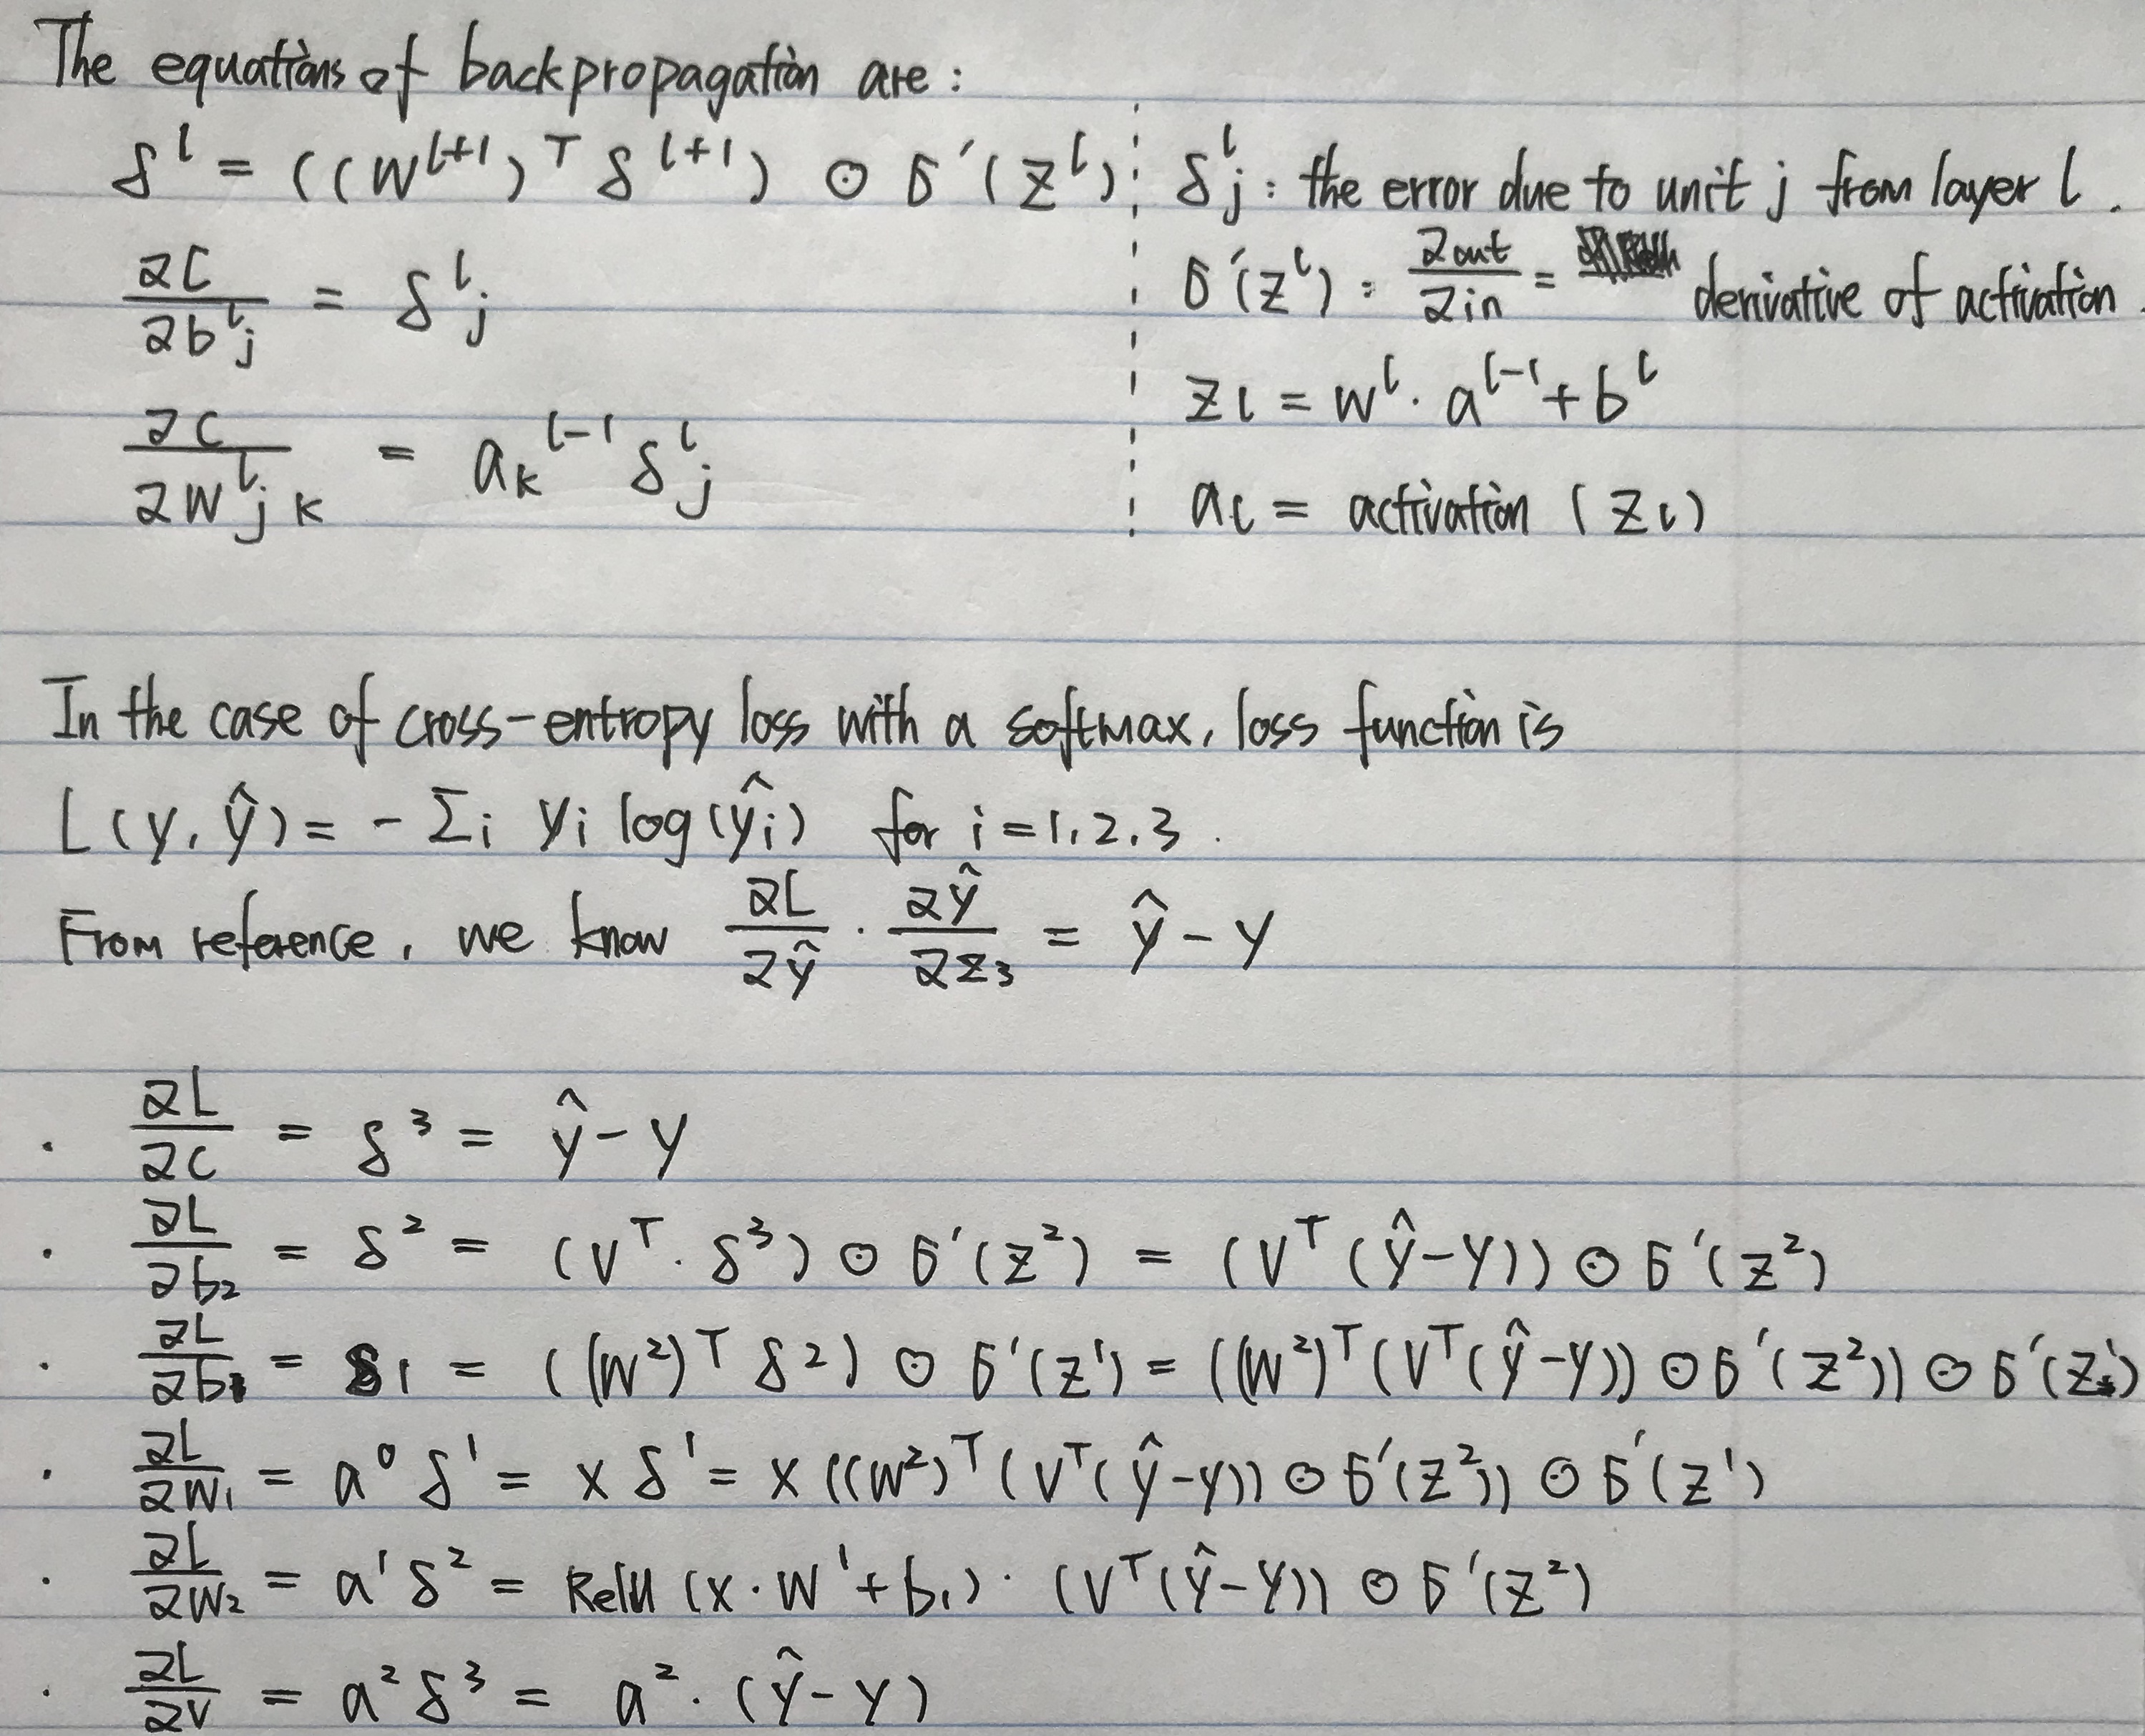

In [10]:
from IPython.display import Image
Image(filename='/Users/troyxiao/Downloads/IMG_8071.JPG') 

### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [11]:
# Define softmax and ReLu
relu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def loss(y, y_hat):
    return -(y * np.log(y_hat)).sum()

def grad_f(X,Y,parameters):  
    W1,b1,W2,b2,V,c = parameters
    
    a1 = np.dot(X,W1.T)+b1.T
    H1 = relu(a1)
    a2 = np.dot(H1,W2.T)+b2.T
    H2 = relu(a2)
    a3 = np.dot(H2,V.T)+c.T
    Y_hat = softmax(a3)
    
    delta_3 = (Y_hat-Y)
    delta_2 = np.dot(delta_3,V)*(H2>0)
    delta_1 = np.dot(delta_2,W2)*(H1>0)
    
    d_c = np.reshape(delta_3.sum(axis=0),(3,1))
    d_b2 = np.reshape(delta_2.sum(axis=0),(2,1))
    d_b1 = np.reshape(delta_1.sum(axis=0),(3,1))
    
    d_V = np.dot(delta_3.T,H2)
    d_W2 = np.dot(delta_2.T,H1)
    d_W1 = np.dot(delta_1.T,X)
    
    return [d_W1,d_b1,d_W2,d_b2,d_V,d_c]

def yhat(X,parameters):
    W1,b1,W2,b2,V,c = parameters
    
    a1 = np.dot(X,W1.T)+b1.T
    H1 = relu(a1)
    a2 = np.dot(H1,W2.T)+b2.T
    H2 = relu(a2)
    a3 = np.dot(H2,V.T)+c.T
    Y_hat = softmax(a3)
    
    return Y_hat

### 3. Plot your sample dataset, coloring data points by their respective class.

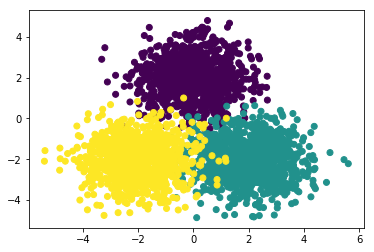

In [12]:
x = np.concatenate((np.random.multivariate_normal(mean=[0,2],cov=[[1,0],[0,1]], size = 1000),
                   np.random.multivariate_normal(mean=[2,-2],cov=[[1,0],[0,1]], size =1000),
                   np.random.multivariate_normal(mean= [-2,-2],cov=[[1,0],[0,1]], size =1000)))
y = np.zeros(3000)
y[1000:2000] = 1
y[2000:3000] = 2
plt.scatter(x[:,0], x[:,1], c=y)

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [13]:
def grad_descent(x, y, parameters, iterations=10, learning_rate=0.1):
    point = parameters
    trajectory = [point]
    losses = [loss(y, yhat(X,point))]
    
    for i in range(iterations):
        grad = grad_f(x,y,point)
        point = np.subtract(point, [i*learning_rate for i in grad])
        trajectory.append(point)
        losses.append(loss(y,yhat(X,point)))
    return (np.array(trajectory), losses)

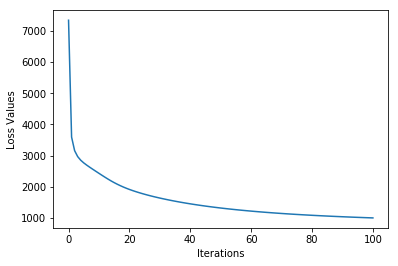

In [14]:
X = x
Y = pd.get_dummies(pd.Series(y)).as_matrix()
parameters = [W1,b1,W2,b2,V,c]
traj, losses = grad_descent(X,Y,parameters,iterations=100,learning_rate=1e-4)

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss Values")

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [15]:
def grad_descent_momentum(x, y, parameters, iterations=10, alpha=.9, epsilon=10):
    point = parameters
    trajectory = [point]
    losses = [loss(y, yhat(X,point))]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        grad = grad_f(x,y,point)
        v = np.add([alpha*i for i in v], [i*epsilon for i in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y,yhat(X,point)))
    return (np.array(trajectory), losses)

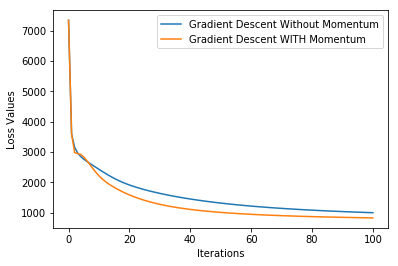

In [16]:
X = x
Y = pd.get_dummies(pd.Series(y)).as_matrix()
parameters = [W1,b1,W2,b2,V,c]

traj, losses = grad_descent(X,Y,parameters,iterations=100,learning_rate=1e-4)
trajMomentum, lossMomentum = grad_descent_momentum(X,Y,parameters,iterations=100,alpha=.5,epsilon = 1e-4)

plt.plot(losses, label='Gradient Descent Without Momentum')
plt.plot(lossMomentum, label='Gradient Descent WITH Momentum')
plt.legend()

plt.xlabel("Iterations")
plt.ylabel("Loss Values")

#### The algorithm with momentum converges more efficiently. As shown in the graph, the total loss values decrease faster for the algorithm with momentum, which indicates a better performace. 